<a href="https://colab.research.google.com/github/AniruddhaChidar/Speech-Emotion-Recognition/blob/master/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Done by : Aniruddha Chidar and Sindhu Pawar**



# Downloading and Exploring the dataset

Downloading dataset using Kaggle. \\
[Link to dataset](https://www.kaggle.com/uwrfkaggler/ravdess-emotional-speech-audio) \\
Link also contains details of dataset. Few of them are : \\
**Files** \\
This portion of the RAVDESS contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.
 
**File naming convention** \\
Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

Filename identifiers

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aniruddhachidar","key":"ad8314bbf0163ccf646064ded533487c"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

 97% 417M/429M [00:15<00:00, 31.5MB/s]
100% 429M/429M [00:15<00:00, 29.0MB/s]


In [ ]:
!mkdir data
%cd data/
!unzip /content/ravdess-emotional-speech-audio.zip

In [ ]:
import os
import random
import sys

dir_list=os.listdir('/content/data')
dir_list.sort()
print (dir_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24', 'audio_speech_actors_01-24']


In [ ]:
dir_list = dir_list[0:24]
print (dir_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [ ]:
%cd /content
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

/content


**Exploring Pysoundfile and librosa**

In [ ]:
import librosa
import librosa.display
!pip install PySoundFile
import soundfile as sf

In [ ]:
data, samplerate = sf.read('/content/data/Actor_01/03-01-01-01-01-01-01.wav')

data

array([0., 0., 0., ..., 0., 0., 0.])

sf.read loads music file and returns amplitude array . PySoundfile is not working for lower amplitudes it is giving 0 for lower amplitudes

In [ ]:
samples, sample_rate = librosa.load('/content/data/Actor_01/03-01-01-01-01-01-01.wav')

samples

array([ 1.5591205e-07, -1.5845627e-07,  1.5362870e-07, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)

librosa.load function load the music file convert it to amplitude array ('samples') \\
 Librosa is working for lower values

PLotting amplitude vs time [Just for fun :)) ]

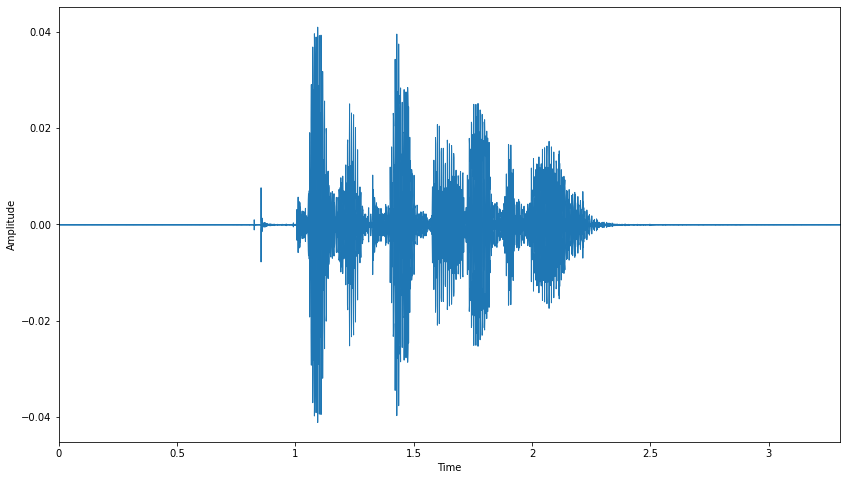

In [ ]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot()
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(samples, sr=sample_rate)

# **Training with Deep Neural Net**

**Pre-Processing the data**

In [ ]:
#All library imports
%matplotlib inline
import csv
import random
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Keras
import tensorflow as tf
#This is simply a linear stack of neural network layers, and it's perfect for the type of feed-forward CNN
from keras.models import Sequential
#keras core layers
from keras.layers import Dense, Dropout, Activation, Flatten
#These are the convolutional layers that will help us efficiently train on the data
from keras.layers import Convolution2D, MaxPooling2D
#Utilities
from keras.utils import np_utils

Using TensorFlow backend.


In [ ]:
def flatten(l):
  flattened_list = [y for x in l for y in x]
  return flattened_list

In [ ]:
X = []
Y = []
curr_dir = "/content/data/"
for i in dir_list:
  dir_path = os.path.join(curr_dir,i)
  for j in os.listdir(dir_path):
    features = []
    songname = os.path.join(dir_path,j)
    p = j.split("-")
    y, sr = librosa.load(songname)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rmse(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    features.append(np.mean(chroma_stft))
    features.append(np.mean(rmse))
    features.append(np.mean(spec_cent))
    features.append(np.mean(spec_bw))
    features.append(np.mean(rolloff))
    features.append(np.mean(zcr))
    for e in mfcc:
      features.append(np.mean(mfcc))
    # flattened_list = flatten(features)
    # print(np.asarray(flattened_list).shape)
    X.append(features)
    Y.append(int(p[2])-1)
X = np.asarray(X)
Y = np.asarray(Y)
print(Y.shape)

In [ ]:
X.shape

(150,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

1440
1440


In [ ]:
#declaring the model
model = Sequential()

In [ ]:
# `#designing the model
# model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,37,166), data_format='channels_first'))
# model.add(Convolution2D(32, 3, 3, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation='softmax'))
model.add(Dense(64, activation='relu', input_shape=(26,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=5,
                    batch_size=16)

# **Training With CNN**

**Moving audio on the basis of labels**

In [ ]:
import os
import shutil

%cd /content
curr_dir = os.getcwd()
features = ["neutral", "calm", "happy", "sad", "angry", "fearful", "disgust", "surprised"]
for i in features:
  os.mkdir(os.path.join(curr_dir,i))
data_dir = '/content/data'
for dirs in dir_list:
  curr_path = os.path.join(data_dir,dirs)
  # print("Ani",curr_path)
  for f in os.listdir(curr_path):
    curr_sub_path = os.path.join(curr_path, f)
    p = f.split("-")
    dire = int(p[2])-1
    source = curr_sub_path
    destination = os.path.join(curr_dir,features[dire])
    shutil.move(source, destination, copy_function = shutil.copytree)

/content


**Extracting Features from audio**

In [ ]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [ ]:
header

['filename',
 'chroma_stft',
 'rmse',
 'spectral_centroid',
 'spectral_bandwidth',
 'rolloff',
 'zero_crossing_rate',
 'mfcc1',
 'mfcc2',
 'mfcc3',
 'mfcc4',
 'mfcc5',
 'mfcc6',
 'mfcc7',
 'mfcc8',
 'mfcc9',
 'mfcc10',
 'mfcc11',
 'mfcc12',
 'mfcc13',
 'mfcc14',
 'mfcc15',
 'mfcc16',
 'mfcc17',
 'mfcc18',
 'mfcc19',
 'mfcc20',
 'label']

In [ ]:
import csv

file = open('data1.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [ ]:
labels = ["neutral", "calm", "happy", "sad", "angry", "fearful", "disgust", "surprised"]

**Saving features in a CSV file**

In [ ]:
import numpy as np

for label in labels:
  for filename in os.listdir(f'./{label}'):
    audio = f'./{label}/{filename}'
    y, sr = librosa.load(audio) # see link here change made

    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rmse(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    # to_append = f'{filename}'
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}' 
    
    for e in mfcc:
      to_append += f' {np.mean(e)}'
    
    to_append += f' {label}'

    file = open('data1.csv', 'a', newline='')
    with file:
      writer = csv.writer(file)
      writer.writerow(to_append.split())

**Checking the created feature set**

In [ ]:
import pandas as pd

data = pd.read_csv('26 Features.csv')
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,03-01-01-01-01-02-20.wav,0.374177,0.002145,2748.073765,2072.097885,4917.051003,0.284351,-706.432786,35.496908,-8.155031,9.848638,-7.176390,-8.942563,-6.918020,-11.706051,-5.992924,-3.611805,-5.465997,-4.442113,-6.207190,-0.123033,-7.738519,-4.664395,-4.200657,-3.216294,-2.571037,-1.924078,neutral
1,03-01-01-01-01-01-21.wav,0.514040,0.005617,2635.308499,2617.477267,5518.337314,0.318498,-593.692179,66.016126,3.537092,13.301964,8.731569,-5.703422,3.174863,-3.922184,-9.186676,-0.027223,-0.879788,-3.754386,-1.044610,2.080261,-2.529025,-1.679427,-3.109143,-0.230662,-1.051353,-0.647632,neutral
2,03-01-01-01-01-01-17.wav,0.533544,0.003920,2212.645689,2641.883324,5181.718868,0.150317,-643.827154,74.381502,9.611290,19.574376,17.023197,7.772526,9.730835,-5.034177,-4.459086,6.967548,-1.243890,1.087277,5.137967,2.759696,2.186184,0.945733,-1.015387,-0.527130,-0.152282,3.503895,neutral
3,03-01-01-01-01-01-11.wav,0.561522,0.001797,2671.386433,2877.458016,5886.085241,0.179849,-731.599288,62.555434,24.082515,20.421414,12.142981,6.484322,6.896530,2.541088,0.215154,1.451110,3.896248,3.671828,-0.210701,2.746649,3.675492,2.668196,0.077824,3.321797,-0.782285,3.392373,neutral
4,03-01-01-01-02-02-15.wav,0.543019,0.004329,2366.081616,2559.472164,5261.645508,0.187453,-634.709460,70.932812,2.774922,14.835037,10.859741,-0.257495,3.952599,-1.254136,-3.198030,1.132633,-0.819777,2.510703,1.103283,1.221286,2.848687,1.129100,0.977723,0.638523,3.192504,1.067305,neutral


In [ ]:
data = data.drop(['filename'],axis=1)
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.374177,0.002145,2748.073765,2072.097885,4917.051003,0.284351,-706.432786,35.496908,-8.155031,9.848638,-7.176390,-8.942563,-6.918020,-11.706051,-5.992924,-3.611805,-5.465997,-4.442113,-6.207190,-0.123033,-7.738519,-4.664395,-4.200657,-3.216294,-2.571037,-1.924078,neutral
1,0.514040,0.005617,2635.308499,2617.477267,5518.337314,0.318498,-593.692179,66.016126,3.537092,13.301964,8.731569,-5.703422,3.174863,-3.922184,-9.186676,-0.027223,-0.879788,-3.754386,-1.044610,2.080261,-2.529025,-1.679427,-3.109143,-0.230662,-1.051353,-0.647632,neutral
2,0.533544,0.003920,2212.645689,2641.883324,5181.718868,0.150317,-643.827154,74.381502,9.611290,19.574376,17.023197,7.772526,9.730835,-5.034177,-4.459086,6.967548,-1.243890,1.087277,5.137967,2.759696,2.186184,0.945733,-1.015387,-0.527130,-0.152282,3.503895,neutral
3,0.561522,0.001797,2671.386433,2877.458016,5886.085241,0.179849,-731.599288,62.555434,24.082515,20.421414,12.142981,6.484322,6.896530,2.541088,0.215154,1.451110,3.896248,3.671828,-0.210701,2.746649,3.675492,2.668196,0.077824,3.321797,-0.782285,3.392373,neutral
4,0.543019,0.004329,2366.081616,2559.472164,5261.645508,0.187453,-634.709460,70.932812,2.774922,14.835037,10.859741,-0.257495,3.952599,-1.254136,-3.198030,1.132633,-0.819777,2.510703,1.103283,1.221286,2.848687,1.129100,0.977723,0.638523,3.192504,1.067305,neutral


In [ ]:
emotion_list = data.iloc[:, -1]
emotion_list

0         neutral
1         neutral
2         neutral
3         neutral
4         neutral
          ...    
1435    surprised
1436    surprised
1437    surprised
1438    surprised
1439    surprised
Name: label, Length: 1440, dtype: object

**Scaling and splitting the dataset**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(emotion_list)
y

array([5, 5, 5, ..., 7, 7, 7])

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [ ]:
X[0]

array([-1.50626589, -0.64876449, -0.35292017, -1.7989194 , -1.1004505 ,
        0.68486771, -1.15893528, -0.83562663, -0.20503463,  0.22187315,
       -0.87147201, -0.69585716, -0.13384697, -0.59416766,  0.24841867,
       -0.50618071, -0.3876182 , -0.33983316, -0.93312278,  0.23669793,
       -1.43849214, -0.93402998, -0.21187372, -0.81858949, -0.15577634,
       -0.45807969])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1152, 26)
(1152,)
(288, 26)
(288,)


**Building the CNN model**

In [ ]:
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from keras.utils import to_categorical

Using TensorFlow backend.


In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
x_g = np.expand_dims(X, axis=2)
x_g.shape

(1440, 26, 1)

**Defining the model architecture**

In [ ]:
model = Sequential()

model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))
model.add(Activation('relu'))

model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))

model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(2)))

model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))

model.add(Flatten())
# Edit according to target class no.
model.add(Dense(8))
model.add(Activation('softmax'))


**Compiling and training the model**

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_g,
                    y,
                    epochs=70,
                    batch_size=16,validation_split=0.20)

Train on 1152 samples, validate on 288 samples
Epoch 1/70
1152/1152 [==============================] - 7s 6ms/step - loss: 1.8823 - accuracy: 0.2283 - val_loss: 2.5599 - val_accuracy: 0.0000e+00
Epoch 2/70
1152/1152 [==============================] - 6s 6ms/step - loss: 1.6405 - accuracy: 0.3220 - val_loss: 2.9150 - val_accuracy: 0.0000e+00
Epoch 3/70
1152/1152 [==============================] - 6s 5ms/step - loss: 1.4974 - accuracy: 0.3845 - val_loss: 3.9618 - val_accuracy: 0.0312
Epoch 4/70
1152/1152 [==============================] - 6s 6ms/step - loss: 1.4243 - accuracy: 0.3984 - val_loss: 5.4285 - val_accuracy: 0.0208
Epoch 5/70
1152/1152 [==============================] - 6s 5ms/step - loss: 1.3763 - accuracy: 0.4332 - val_loss: 5.4064 - val_accuracy: 0.0312
Epoch 6/70
1152/1152 [==============================] - 6s 6ms/step - loss: 1.2558 - accuracy: 0.4887 - val_loss: 7.1267 - val_accuracy: 0.0312
Epoch 7/70
1152/1152 [==============================] - 6s 6ms/step - loss: 1.231

**Evaluating the model**

In [ ]:
test_loss, test_acc = model.evaluate(x_testcnn,y_test)
print('test_acc: ',test_acc)

288/288 [==============================] - 0s 715us/step
test_acc:  0.8298611044883728


In [ ]:
y_test

array([2, 6, 7, 1, 4, 1, 7, 1, 0, 6, 4, 1, 0, 7, 0, 0, 2, 3, 5, 7, 4, 2,
       1, 4, 3, 4, 7, 5, 2, 2, 6, 7, 7, 3, 7, 5, 3, 3, 6, 7, 3, 4, 4, 2,
       0, 2, 3, 5, 0, 0, 5, 2, 5, 0, 4, 3, 5, 2, 0, 6, 4, 2, 5, 6, 4, 4,
       1, 2, 0, 2, 1, 7, 6, 7, 2, 7, 4, 7, 1, 1, 7, 2, 2, 1, 2, 2, 5, 7,
       6, 6, 2, 5, 6, 1, 3, 7, 3, 6, 4, 1, 2, 4, 7, 1, 7, 3, 1, 4, 2, 0,
       3, 0, 7, 4, 4, 4, 7, 0, 1, 6, 0, 4, 7, 3, 7, 1, 2, 6, 3, 5, 2, 2,
       6, 5, 4, 0, 2, 2, 2, 2, 5, 7, 7, 3, 1, 3, 7, 4, 3, 4, 4, 1, 5, 7,
       6, 0, 6, 5, 4, 6, 0, 6, 3, 6, 5, 1, 7, 6, 3, 3, 6, 5, 5, 7, 3, 4,
       2, 3, 6, 0, 0, 4, 0, 1, 7, 2, 0, 0, 6, 3, 1, 5, 1, 4, 2, 7, 1, 1,
       7, 4, 2, 6, 0, 1, 0, 0, 0, 4, 1, 3, 5, 4, 1, 7, 3, 7, 1, 5, 1, 1,
       0, 3, 1, 4, 7, 0, 1, 7, 4, 6, 1, 1, 7, 3, 1, 1, 3, 4, 1, 5, 7, 0,
       1, 6, 0, 2, 4, 7, 6, 7, 2, 6, 4, 1, 7, 4, 0, 6, 0, 7, 1, 6, 6, 2,
       4, 6, 4, 3, 2, 5, 0, 7, 0, 6, 4, 5, 4, 7, 6, 2, 5, 4, 4, 6, 6, 7,
       6, 4])

In [ ]:
model.predict_classes(x_testcnn)

array([2, 5, 7, 1, 7, 5, 2, 5, 0, 5, 4, 1, 0, 7, 0, 0, 4, 4, 2, 7, 4, 0,
       1, 4, 7, 7, 4, 1, 2, 2, 7, 7, 7, 7, 7, 2, 4, 0, 2, 2, 7, 4, 4, 2,
       0, 2, 4, 5, 0, 0, 2, 2, 3, 7, 4, 3, 5, 2, 0, 2, 4, 2, 5, 6, 7, 4,
       1, 2, 2, 2, 2, 7, 6, 7, 7, 7, 4, 7, 1, 1, 7, 2, 2, 1, 7, 2, 4, 7,
       4, 7, 4, 5, 6, 1, 7, 7, 3, 6, 3, 5, 5, 7, 7, 1, 7, 3, 5, 7, 2, 0,
       0, 0, 7, 4, 4, 4, 7, 0, 1, 3, 2, 5, 7, 3, 7, 1, 2, 4, 7, 2, 2, 7,
       6, 5, 4, 2, 2, 2, 2, 2, 2, 7, 7, 3, 1, 4, 7, 3, 7, 4, 3, 1, 7, 7,
       2, 7, 3, 4, 4, 7, 0, 5, 3, 6, 5, 1, 7, 2, 3, 3, 5, 5, 5, 7, 5, 4,
       7, 3, 6, 0, 2, 4, 7, 1, 7, 2, 0, 0, 4, 3, 2, 1, 1, 4, 2, 7, 5, 5,
       7, 4, 2, 5, 4, 1, 4, 0, 0, 4, 1, 3, 6, 7, 5, 4, 3, 7, 1, 6, 1, 1,
       0, 3, 5, 7, 7, 0, 1, 7, 4, 5, 1, 1, 7, 3, 1, 2, 3, 4, 1, 3, 7, 0,
       5, 3, 0, 2, 4, 7, 6, 7, 2, 6, 4, 2, 4, 4, 0, 3, 0, 7, 1, 1, 7, 2,
       4, 4, 4, 3, 2, 5, 0, 4, 4, 6, 4, 5, 4, 4, 5, 4, 1, 7, 4, 1, 5, 7,
       5, 4])

In [ ]:
x_testcnn.shape

(288, 26, 1)

**Predict on custom audio file**

In [ ]:
def predict(filename,model):
  y, sr = librosa.load(filename)

  chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
  rmse = librosa.feature.rmse(y=y)
  spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
  spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
  rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
  zcr = librosa.feature.zero_crossing_rate(y)
  mfcc = librosa.feature.mfcc(y=y, sr=sr)
      # to_append = f'{filename}'
  to_append = f'{np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}' 
      
  for e in mfcc:
    to_append += f' {np.mean(e)}'

  my_x=to_append.split()
  my_xe = np.expand_dims(my_x,axis=1)
  my_xee = np.expand_dims(my_xe,axis=0)

  arr=model.predict_classes(my_xee)

  return labels[arr[0]]
  

In [ ]:
predict('p1.mpeg',model)

'sad'

**Saving the model**

In [ ]:
def save(model):
  model_json = model.to_json()
  with open("model.json", "w") as json_file:
      json_file.write(model_json)
  # serialize weights to HDF5
  model.save_weights("model.h5")
  print("Saved model to disk")

In [ ]:
save(model)

Saved model to disk


**Load saved model**

In [ ]:
from keras.models import model_from_json

def load(jsonfile,h5file):
  json_file = open(jsonfile, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  loaded_model = model_from_json(loaded_model_json)
  # load weights into new model
  loaded_model.load_weights(h5file)

  loaded_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  print("Loaded model from disk")

  return loaded_model 

In [ ]:
loaded_model=load('model.json','model.h5')

Loaded model from disk


In [ ]:
test_loss, test_acc = loaded_model.evaluat    e(x_testcnn,y_test)
print('test_acc: ',test_acc)

288/288 [==============================] - 0s 930us/step
test_acc:  0.6319444179534912


**Interpeting and visualizing our model**

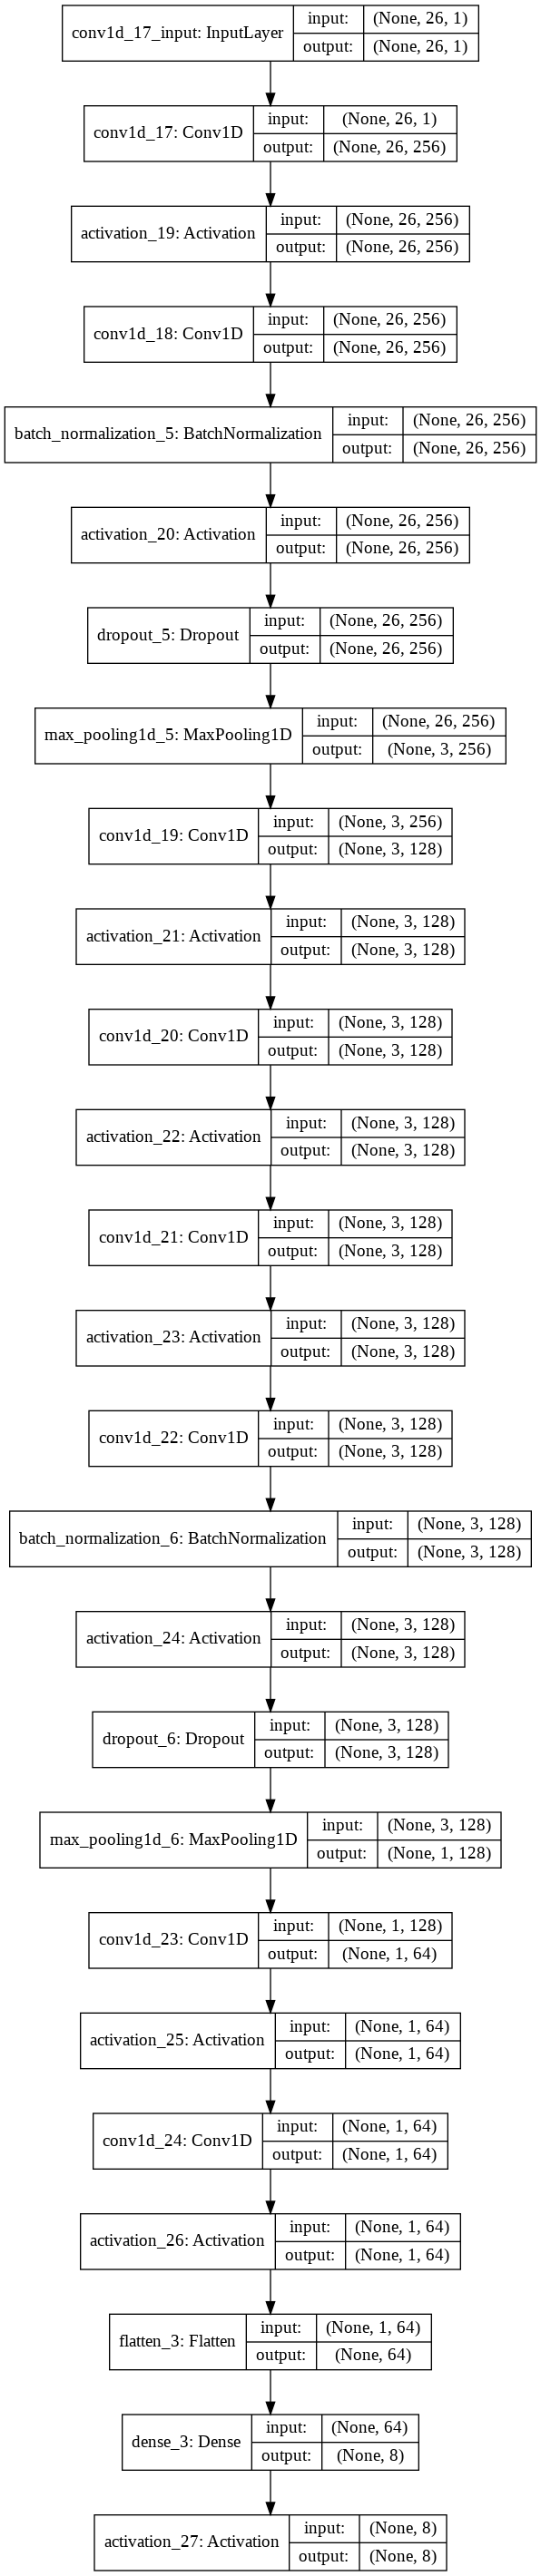

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

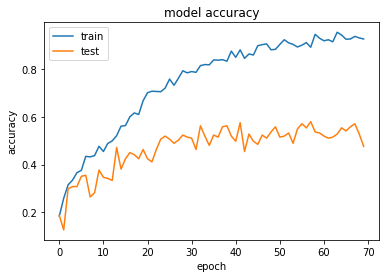

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()